<a href="https://colab.research.google.com/github/prit-tech/IMDB-Movie-Reivew-Sentiment/blob/master/Sentiment_Analysis_IMDB_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Classification


**Problem Description:**
Generate Word Embedding and retrieve outputs of each layer with Keras based
on the Classification task.
Word embedding are a type of word representation that allows words with
similar meaning to have a similar representation.
It is a distributed representation for the text that is perhaps one of the key
breakthroughs for the impressive performance of deep learning methods on
challenging natural language processing problems.
We will use the IMDb dataset to learn word embedding as we train our dataset.
This dataset contains 25,000 movie reviews from IMDB, labeled with a sentiment
(positive or negative).

**Data Description:**
The Dataset of 25,000 movie reviews from IMDB, labeled by sentiment
(positive/negative). Reviews have been preprocessed, and each review is encoded
as a sequence of word indexes (integers). For convenience, the words are indexed
by their frequency in the dataset, meaning the for that has index 1 is the most
frequent word. Use the first 20 words from each review to speed up training,
using a max vocab size of 10,000.
As a convention, "0" does not stand for a specific word, but instead is used to
encode any unknown word.

**Steps and tasks:**
1. Import test and train data (5 points)
2. Import the labels (train and test) (5 points)
3. Get the word index and then Create a key-value pair for word and word_id
(15 points)
4. Build a Sequential Model using Keras for the Sentiment Classification task
(15 points)
5. Report the Accuracy of the model (5 points)
6. Retrieve the output of each layer in Keras for a given single test sample
from the trained model you built (5 points)

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
import os
os.chdir('/content/drive/My Drive/Colab/Deep Learning/Natural Language Processing/Project/')
path = '.'
glove_dir = '/content/drive/My Drive/Colab/Deep Learning/Natural Language Processing/Project/'

## Importing all the necessary libraries

In [0]:
import numpy as np 
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense
from keras.models import Model
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.layers import Activation, Dense
from keras.layers import Dropout, Flatten
from keras import regularizers
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from keras import backend as K

Using TensorFlow backend.


## Loading the dataset

In [0]:
from keras.datasets import imdb

vocab_size = 10000 #vocab size

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size) # vocab_size is no.of words to consider from the dataset, ordering based on frequency.

### Printing the first training record

In [0]:
print(x_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


### The corresponding label:

In [0]:
print("Label: ", y_train[0])

('Label: ', 1)


### Get the word index and then Create a key-value pair for word and word_id

In [0]:
word_index = imdb.get_word_index()

In [0]:
index_word = {k:v for k,v in word_index.items()}

In [0]:
word_index = imdb.get_word_index() # get {word : index}
index_word = {v : k for k,v in word_index.items()} # get {index : word}

index = 0
print(" ".join([index_word[idx] for idx in x_train[index]]))


the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have tw

Displaying the sentiment(label) of above review:

In [0]:
print("Positve" if y_train[index]==1 else "Negetive")

Positve


In [0]:
print("Total %s unique tokens." % len(word_index))

Total 88584 unique tokens.


In [0]:
from keras.preprocessing.sequence import pad_sequences
vocab_size = 10000 #vocab size
maxlen = 300  #number of word used from each review

## Train test split

In [0]:
#load dataset as a list of ints
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)
#make all sequences of the same length 
x_train = pad_sequences(x_train, maxlen=maxlen, padding='post')
x_test =  pad_sequences(x_test, maxlen=maxlen, padding='post')

In [0]:
x_train

array([[   1,   14,   22, ...,    0,    0,    0],
       [   1,  194, 1153, ...,    0,    0,    0],
       [   1,   14,   47, ...,    0,    0,    0],
       ...,
       [   1,   11,    6, ...,    0,    0,    0],
       [   1, 1446, 7079, ...,    0,    0,    0],
       [   1,   17,    6, ...,    0,    0,    0]], dtype=int32)

In [0]:
x_test

array([[   1,  591,  202, ...,    0,    0,    0],
       [   1,   14,   22, ...,    0,    0,    0],
       [1239, 5189,  137, ...,    9,   57,  975],
       ...,
       [   1,   13, 1408, ...,    0,    0,    0],
       [   1,   11,  119, ...,    0,    0,    0],
       [   1,    6,   52, ...,    0,    0,    0]], dtype=int32)

In [0]:
y_train

array([1, 0, 0, ..., 0, 1, 0])

In [0]:
y_test

array([0, 1, 1, ..., 0, 0, 0])

In [0]:
print('x_train Shape : ', x_train.shape)
print('x_test Shape  : ', x_test.shape)
print('y_train Shape : ', y_train.shape)
print('y_test Shape  : ', y_test.shape)

('x_train Shape : ', (25000, 300))
('x_test Shape  : ', (25000, 300))
('y_train Shape : ', (25000,))
('y_test Shape  : ', (25000,))


## Build Keras Embedding Layer Model
We can think of the Embedding layer as a dicionary that maps a index assigned to a word to a word vector. This layer is very flexible and can be used in a few ways:

* The embedding layer can be used at the start of a larger deep learning model. 
* Also we could load pre-train word embeddings into the embedding layer when we create our model.
* Use the embedding layer to train our own word2vec models.

The keras embedding layer doesn't require us to onehot encode our words, instead we have to give each word a unqiue intger number as an id. For the imdb dataset we've loaded this has already been done, but if this wasn't the case we could use sklearn [LabelEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html).

#### Here I am using pretrained GloVe Embedding

In [0]:
embeddings_index = {}

f = open(os.path.join(glove_dir, "glove.6B.50d.txt"))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype="float32")
    embeddings_index[word] = coefs
f.close()

print("found %s word vectors." % len (embeddings_index))

found 400000 word vectors.


The entire GloVe word embedding file is loaded into memory as a dictionary of word to embedding array embeddings_index = {}

Next, we need an embedding matrix that can be loaded into an Embedding layer. The matrix shape must be (max_words, embedding_dim), which is has a shape of a 10000 x 50 matrix. GloVe is 50 x 400000.

In [0]:
print(embeddings_index)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### Preparing the GloVe word embeddings matrix:

In [0]:
embedding_dim = 50 # GloVe contains 50-dimensional embedding vectors for 400000 words
maxlen = 300 
embedding_matrix = np.zeros((vocab_size, embedding_dim)) # embedding_matrix.shape (10000, 50)
for word, i in word_index.items():
    if i < vocab_size:
        embedding_vector = embeddings_index.get(word) # embedding_vector.shape (50,)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector # Words not found in the mebedding index will all be zeros

In [0]:
print(embedding_matrix)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.41800001  0.24968    -0.41242    ... -0.18411    -0.11514
  -0.78580999]
 [ 0.26818001  0.14346001 -0.27877    ... -0.63209999 -0.25027999
  -0.38097   ]
 ...
 [-0.47567001  0.64363998 -0.32692    ... -0.20565    -0.093098
  -0.46967   ]
 [ 0.26205999 -0.50996    -0.78754997 ...  0.43805     0.32886001
   0.26629999]
 [-0.063412    0.72070003 -0.46972999 ... -0.81309003  0.2098
   0.41644001]]


## Build a Sequential Model using Keras for the Sentiment Classification task

In [0]:
inp = Input(shape=(maxlen,))
x = Embedding(vocab_size, embedding_dim, weights=[embedding_matrix])(inp)
x = Bidirectional(LSTM(embedding_dim, return_sequences=True, dropout=0.1, recurrent_dropout=0.1))(x)
x = GlobalMaxPool1D()(x)
x = Dense(300, activation="relu")(x)
x = Dropout(0.1)(x)
x = Dense(1, activation="sigmoid")(x)
model = Model(inputs=inp, outputs=x)

In [0]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 300)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 300, 50)           500000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 300, 100)          40400     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 300)               30300     
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 301 

### Compiling the model and setting the calback

In [0]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience= 5)]
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Training the Model and Reporting the Accuracy of the model:

In [0]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test),
          epochs=10, batch_size=64, callbacks = callbacks)

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 220s 9ms/step - loss: 0.0584 - accuracy: 0.9804 - val_loss: 0.4477 - val_accuracy: 0.8760
Epoch 2/10
25000/25000 [==============================] - 220s 9ms/step - loss: 0.0446 - accuracy: 0.9848 - val_loss: 0.4687 - val_accuracy: 0.8771
Epoch 3/10
25000/25000 [==============================] - 220s 9ms/step - loss: 0.0349 - accuracy: 0.9888 - val_loss: 0.5079 - val_accuracy: 0.8756
Epoch 4/10
25000/25000 [==============================] - 220s 9ms/step - loss: 0.0322 - accuracy: 0.9886 - val_loss: 0.5827 - val_accuracy: 0.8714
Epoch 5/10
25000/25000 [==============================] - 219s 9ms/step - loss: 0.0258 - accuracy: 0.9910 - val_loss: 0.6699 - val_accuracy: 0.8551
Epoch 6/10
25000/25000 [==============================] - 219s 9ms/step - loss: 0.0254 - accuracy: 0.9914 - val_loss: 0.6100 - val_accuracy: 0.8728


<b>Comment:</b> Here I have set a callback fucntion which will stop the iteration if accuracy will not be increasing futher so it stops at 6 epocs.
Train accuracy is 99 and validation accuray is 87 which is a sign of that the model will perform well.

In [0]:
 # Saving model
model.save('IMDB_model_GL.h5')

In [0]:
# Next, comparing how the model performs on the test dataset:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)


25000/25000 [==============================] - 69s 3ms/step


In [0]:
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

('Test loss:', 0.6099941605952383)
('Test accuracy:', 0.8728399872779846)


#### Making predicitions

In [0]:
%%time
mode_predict=model.predict(x_test)

CPU times: user 1min 5s, sys: 502 ms, total: 1min 6s
Wall time: 1min 4s


#### Changing the shape of y_predict to 1-Dimensional

In [0]:
y_predict=mode_predict.ravel()
y_predict=(y_predict>0.5)
y_predict[0:10]

array([False,  True, False,  True,  True,  True,  True, False,  True,
        True])

In [0]:
predicted = model.predict(x_test)
predicted_y = predicted.round().ravel().astype('int32')

In [0]:
predicted_df = pd.DataFrame( { "Y Actual":y_test, "Y Predicted": predicted_y } )
predicted_df.head()

,Y Actual,Y Predicted
0,0,0
1,1,1
2,1,0
3,0,1
4,1,1


<b>Comment: </b> Above I have displayed the actual and predicted label

#### Classification report for performance metrics

In [0]:
classsificationReport = classification_report(y_test,y_predict, target_names=['Negative', 'Positive'])
print(classsificationReport)

              precision    recall  f1-score   support

    Negative       0.86      0.89      0.87     12500
    Positive       0.89      0.86      0.87     12500

   micro avg       0.87      0.87      0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000



In [0]:
confusionMatrix = confusion_matrix(y_test,y_predict)
confusionMatrix

array([[11110,  1390],
       [ 1789, 10711]])

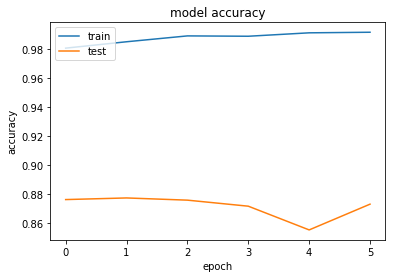

In [0]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Retrive the output of each layer in keras for a given single test sample from the trained model you built

##### Here I am taking two test samples:

In [0]:
test_sample_1 = 20
test_sample_2 = 113

#### Here displaying the output of each layers for a given test sample test_sample_1 :

In [0]:
inp = model.input                                           
outputs = [layer.output for layer in model.layers]      
functors = [K.function([inp], [out]) for out in outputs]    
test = x_test[test_sample_1][np.newaxis,...]
layer_outs = [func([test]) for func in functors]
print(layer_outs)

[[array([[1.000e+00, 1.400e+01, 2.200e+01, 1.600e+01, 3.100e+01, 1.500e+01,
        1.300e+01, 2.800e+01, 4.465e+03, 8.000e+00, 6.700e+01, 1.800e+01,
        4.900e+01, 5.800e+01, 1.300e+01, 1.600e+01, 1.264e+03, 8.000e+00,
        1.690e+02, 1.200e+01, 4.700e+01, 7.700e+01, 2.850e+02, 6.658e+03,
        4.000e+00, 4.870e+02, 7.000e+00, 1.400e+01, 2.200e+01, 4.700e+01,
        7.700e+01, 3.800e+01, 8.625e+03, 2.882e+03, 5.000e+00, 2.000e+00,
        2.300e+02, 7.240e+02, 5.100e+01, 9.000e+00, 1.100e+02, 3.400e+01,
        4.000e+00, 3.110e+02, 1.300e+01, 2.580e+02, 1.200e+01, 1.139e+03,
        1.500e+01, 3.800e+01, 1.110e+02, 8.400e+01, 1.490e+02, 8.000e+01,
        2.400e+01, 3.320e+02, 2.000e+02, 4.900e+01, 5.500e+01, 6.740e+02,
        4.110e+02, 2.100e+01, 8.490e+02, 4.800e+01, 2.400e+01, 4.000e+00,
        2.000e+01, 8.000e+01, 9.700e+01, 2.810e+02, 1.100e+01, 6.000e+00,
        2.750e+02, 9.600e+01, 5.000e+00, 9.000e+00, 5.500e+01, 5.300e+02,
        4.000e+00, 2.200e+01, 4.700e

### Predicting the review's sentiment for test sample:

In [0]:
INDEX_FROM=3 
word_to_id = imdb.get_word_index()
word_to_id = {k:(v+INDEX_FROM) for k,v in word_to_id.items()}
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
word_to_id["<UNK>"] = 2
word_to_id["<UNUSED>"] = 3

id_to_word = {value:key for key,value in word_to_id.items()}

### Here I am taking two sample reviews from test dataset

In [0]:
user_review_1 = x_test[test_sample_1]
user_review_2 = x_test[test_sample_2]

In [0]:
print('Actual label of first Review  : {}'.format(y_test[test_sample_1]))
print('\n==================================\n')

print(' '.join(id_to_word[id] for id in user_review_1 ))

Actual label of first Review  : 1


<START> this film was one that i have waited to see for some time i was glad to find it has been everything anticipated the writing of this film has been so finely crafted and <UNK> far beyond what is seen by the audience i found it amusing that so many people watching will not read between some very important lines but indeed if not the movie will make sense in a different way and is very brilliant the film has many stories and characters woven together around this one character <UNK> a man whom has rose from the streets amidst many <UNK> and become a very powerful criminal after spending some time in prison <UNK> finds a <UNK> in the justice system and through a disturbing turn of events is released only to find everything is not at all what it seems <UNK> finds himself going up against the higher realm of society and political <UNK> in order to make clear how important a man's word is and stands for a war begins as the street is in arms against <U

<b>Comment:</b> Above is the user review for a movie from test data

In [0]:
print('Actual label of second Review  : {}'.format(y_test[test_sample_2]))
print('\n==================================')
print(' '.join(id_to_word[id] for id in user_review_2 ))

Actual label of second Review  : 0

<START> this film probably would have been good if they didn't use cgi computer generated imagery for the werewolf scenes it made the creatures look fake and the werewolves looked cartoonish cgi is great for certain effects like the in jurassic park or <UNK> but when we see a film where the creature must look completely real cgi is not the way to go look at an american werewolf in london no cgi just makeup and a mechanical creature and what you come up with was more realistic than what was shown in the sequel this film did offer a few gags that was fun to watch and the humor in this movie seemed to have drawn me in but it's nothing more than a film that i thought was o k and that's not good enough in my opinion an american werewolf in paris doesn't hold up to the original <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <

<b>Comment:</b> Above is the user review for a movie from test data

In [0]:
# Texts 
texts = (user_review_1, user_review_2)
padded_texts = pad_sequences(texts, maxlen=maxlen, value = 0.0)

# Generating predictions
predictions = model.predict(padded_texts)
print(predictions[0])
print(predictions[1])

[0.9999999]
[0.00018888]


###### Above we can see the probability of both the sample reviews which I have taken from test dataset. 
- My consideration:
  - As I have used sigmoid activation funtion so if predicted probability of a review is greater than 0.5 which will be considered as 'possitive sentiment' or else review's sentiment will be classified as a 'negative sentiment'. 

#### Here defining a function to classify the sentiment:

In [0]:
def predict_review(predict):
    if predict == 0:
      return 'Negative'
    else :
      return 'Postive'

In [0]:
 print("User's sentiment for first sample review is  : " + predict_review(int(round(predictions[0]))))

User's sentiment for first sample review is  : Postive


In [0]:
 print("User's sentiment for second sample review is : " + predict_review(int(round(predictions[1]))))

User's sentiment for second sample review is : Negative


### Summary:
- From the above test samples :
- For the first review, the prediction is 0.9999999 which is close to 1, "good". This makes sense that the text clearly indicates that the viewer had positive sentiment about the movie. Also, some possitive words we can read in this review those are: 'glad', 'excellent', 'finely', 'outstanding'. 
- For the Second review, the prediction is 0.00018888 which is close to 0,  "bad". This makes sense that the text indicates that the viewer had a negative sentiment about the movie. Some negative words in this review are : 'not good', 'look fake', ''wasted.
